# Import required packages

In [19]:
import numpy as np
from matplotlib import pyplot as plt

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ 
for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

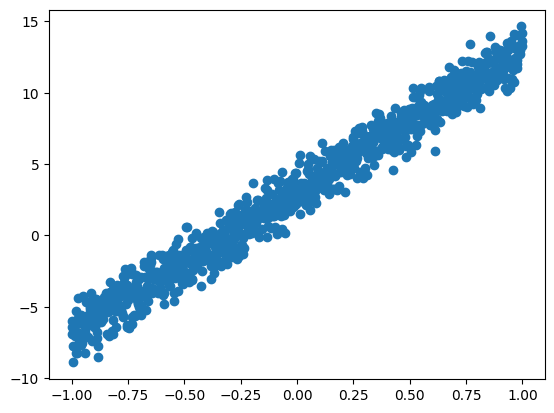

In [129]:
# Creates mock data with noise (I didn't write this, no idea wtf is going on)
N = 1000 # sample size

true_beta = np.array([3, 10])
x = np.linspace(-1, 1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0, 1, N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x, y)

## Linear Regression

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [130]:
# Find difference between each calculated y point value and true y value [y - (c + mx)]
def findDiff(x, y, test_beta):
	# Finding y values of test beta values
	x1 = np.vstack([np.ones(x.shape), x])
	test_y = np.matmul(test_beta, x1)
	return y - test_y # return difference

# Loss function
def calcLoss(x, y, test_beta, N):
	diff_y = findDiff(x, y, test_beta)
	return (np.sum(diff_y ** 2)) / N # Calcualte mean square error

# Calculate delta for change in beta
def calcDelta(x, y, test_beta, N):
	diff_y = findDiff(x, y, test_beta)
	grads = np.ones(2)
	grads[0] = np.sum(diff_y)
	grads[1] = np.sum(diff_y * x)
	return (-2 / N) * grads

# Calculate beta
def calcBeta(x, y, N):
	alpha = 0.1
	tol = 1e-7
	beta = np.random.normal(0,1,2)
	prevBeta = np.zeros(2)

	while np.abs(calcLoss(x, y, beta, N) - calcLoss(x, y, prevBeta, N)) >= tol: # while change in beta is less than tolerance
		delta = calcDelta(x, y, beta, N)
		prevBeta = beta.copy()
		beta = beta - alpha * delta # update parameters

	return beta

beta = calcBeta(x, y, N)

## Visualizing the result

The estimated value for beta is: [3.05143627 9.94961358]
The true value for beta is: [ 3 10]


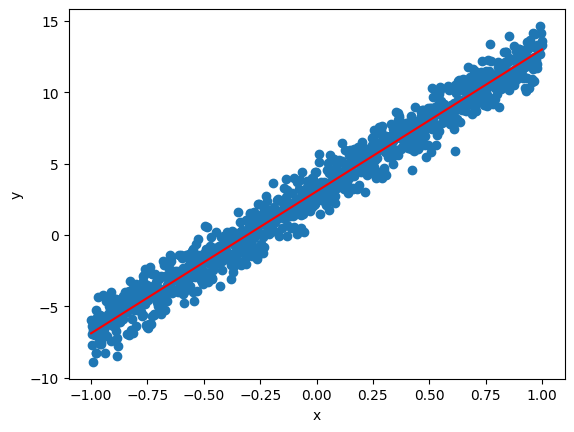

In [131]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()